<h2 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Métodos Numericos, Taller 5</span></h2>

<h1 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Solución de Ecuaciones Diferenciales, Métodos de Runge-kutta</span></h1>

<p style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Universidad del Valle, Departamento de f&iacute;sica, Cali, Colombia</span></p>

<h3 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Miguel &Aacute;ngel Jaramillo Quengu&aacute;n</span></h3>

<p style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Codigo: 2070763</span></p>

<p style="text-align:center"><span style="font-family:Courier New,Courier,monospace"><a href="mailto:miguel.quenguan@correounivalle.edu.co">miguel.quenguan@correounivalle.edu.co</a></span></p>

<p style="text-align:center">Presentado a Miguel Angel Vargas</p>

In [20]:
#librerías usadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


12 de agosto de 2022

# Problema a estudiar 

Considere la siguiente ecuación diferencial ordinaria con problema de valor inicial

$$\dot{x}=x+\sin{t}\ x(4)=0.9$$

**a.** Encuentre la solución real de forma analítica del problema anterior y presentela en una celda markdown.

**b.** Con la solución real determine el valor $x(5.5)$ y grafique la función en el dominio $(4,5.5)$

# solución analítica.

$$\frac{dx}{dt}=x+\sin{t}$$

$$\frac{dx}{dt}-x=\sin{t}$$

multiplicando la ecuacion por el factor integrante $e^{-t}$

$$e^{-t}\frac{dx}{dt}-e^{-t}x=e^{-t}\sin{t}$$

teniendo en cuenta que $-e^{-t}=\frac{d}{dt}(e^{-t})$

$$e^{-t}\frac{dx}{dt}+\frac{d}{dt}(e^{-t}) x = e^{-t}\sin{t}$$

Aplicando regla del producto en derivada se encuentra:

$$ \frac{d}{dt}(e^{-t} x )=e^{-t}\sin{t}$$

Integrando ambos lados se tiene:

$$e^{-t}x = -\frac{1}{2}(\cos{t}+\sin{t})+C $$

por tanto:

$$x=-\frac{1}{2}(\cos{t}-\sin{t})+C e^{t}$$



Se toma la constante de integración $C=0.00356746$. dadas las condiciones iniciales para el problema.

In [21]:
# definiendo función de solución real
def x(t):
    return 0.00356746*np.exp(t)-1/2*(np.cos(t)+np.sin(t)) 

    
#return (np.cos(t)-.35364)/(t-1)


El valor de x(5.5) en la solución real es: 0.8713639563148816


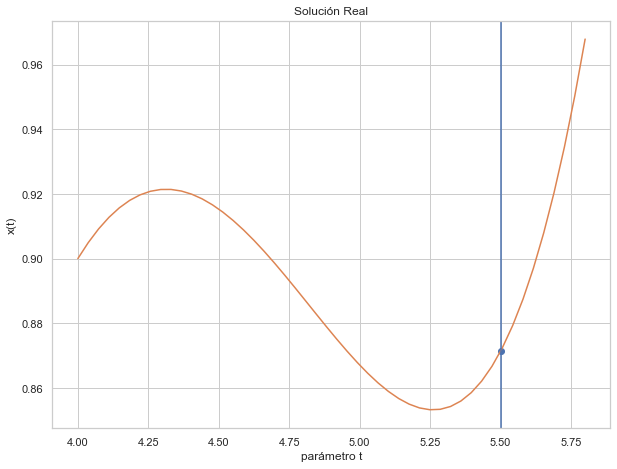

In [22]:
# determinando x(5.5) y graficando la solución.
print(f'El valor de x(5.5) en la solución real es: {x(5.5)}')

t=np.linspace(4,5.8,50)
plt.xlabel('parámetro t')
plt.ylabel('x(t)')
plt.title('Solución Real')
plt.plot(5.5,x(5.5),'-o')
plt.plot(t,x(t))
plt.axvline(x=5.5)

In [23]:
#definiendo la ecuación diferencial
def xp(x,t):
    return x+np.sin(t)
    

In [24]:
def Euler(f,t0,x0,tk,k):
    h=(tk-t0)/k #t0>tk
    x=[]
    t=[]
    x.append(x0)
    for i in range(k):
        ti=t0+i*h
        t.append(ti)
        xs=x[i]+h*f(x[i],ti)
        x.append(xs)
    del(x[k])
    return x,t


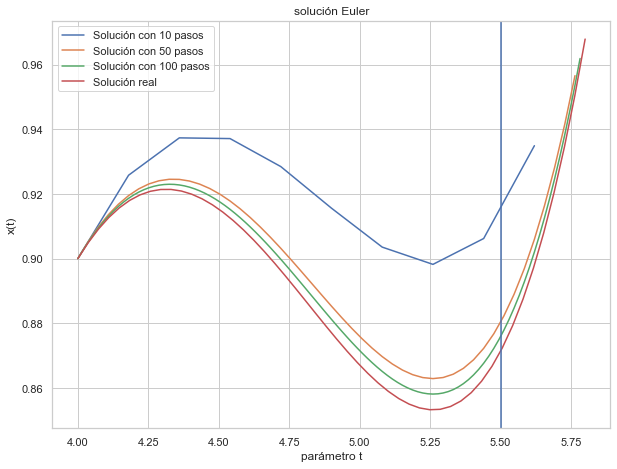

In [25]:
#solucionando con Euler para distintos pasos
list_k=[10,50,100]
Sols_Euler=[]
Tiemp_Euler=[]
for m in list_k:
    xE,tE=Euler(xp,4,0.9,5.8,m)
    Sols_Euler.append(xE)
    Tiemp_Euler.append(tE)

    plt.rcParams["figure.figsize"] = (10,7.5)
    plt.plot(tE,xE,label=f'Solución con {m} pasos')
    #print(xE,tE)

plt.plot(t,x(t),'r',label='Solución real')
plt.legend()
plt.title('solución Euler')
plt.xlabel('parámetro t')
plt.ylabel('x(t)')

#plt.plot(5.5,x(),'-o')
plt.axvline(x=5.5)
plt.show()


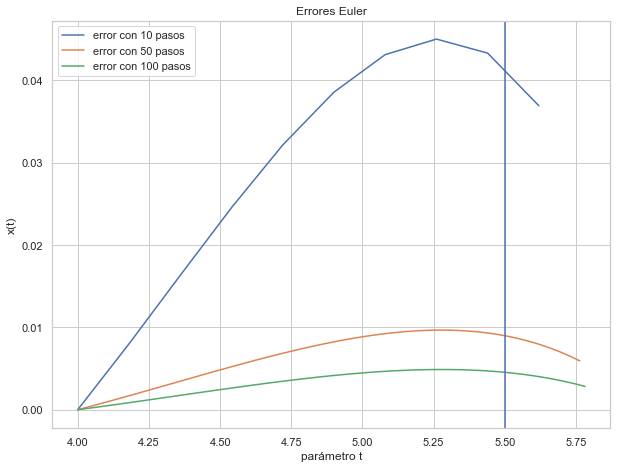

In [26]:
# calculando errores absolutos
Errores_Euler=[]
for j in range(len(list_k)):
    d=list_k[j]
    error=np.abs(Sols_Euler[j]-x(Tiemp_Euler[j]))
    Errores_Euler.append(error) #Guarda el error en orden para cada k en list_k
    plt.plot(Tiemp_Euler[j],error,label=f'error con {d} pasos')

plt.rcParams["figure.figsize"] = (10,7.5)
plt.legend()
plt.title('Errores Euler')
plt.xlabel('parámetro t')
plt.ylabel('x(t)')

#plt.plot(5.5,x(),'-o')
plt.axvline(x=5.5)
plt.show()

---

# Metodo de Runge-kutta orden 2

In [27]:
def RK2(f,t0,x0,tk,k):
    h=(tk-t0)/k #t0>tk
    x=[]
    t=[]
    x.append(x0)
    for i in range(k):
        ti=t0+i*h
        t.append(ti)

        p1=f(x[i],ti)*h
        p2=f(x[i]+p1,ti+h)*h

        xs=x[i]+(1/2)*(p1+p2)
        x.append(xs)
    del(x[k])
    return x,t

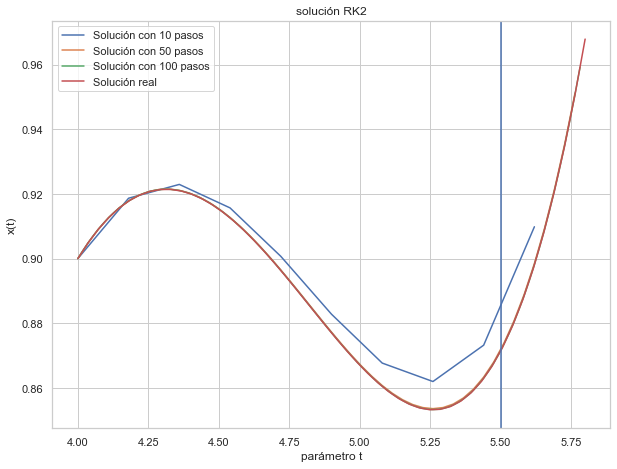

In [28]:
#solucionando con Rk2 para distintos pasos
Sols_RK2=[]
Tiemp_RK2=[]
for m in list_k:
    xRK2,tRK2=RK2(xp,4,0.9,5.8,m)
    Sols_RK2.append(xRK2)
    Tiemp_RK2.append(tRK2)

    plt.rcParams["figure.figsize"] = (10,7.5)
    plt.plot(tRK2,xRK2,label=f'Solución con {m} pasos')
    #print(xE,tE)
    
plt.plot(t,x(t),'r',label='Solución real')
plt.legend()
plt.title('solución RK2')
plt.xlabel('parámetro t')
plt.ylabel('x(t)')

#plt.plot(5.5,x(),'-o')
plt.axvline(x=5.5)
plt.show()


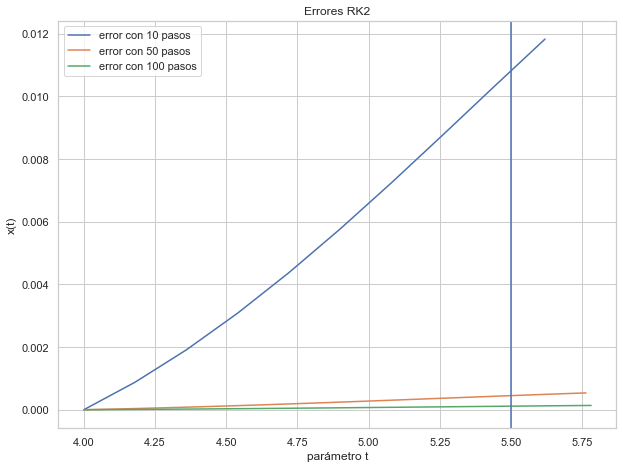

In [29]:
# calculando errores absolutos RK2
Errores_RK2=[]
for j in range(len(list_k)):
    d=list_k[j]
    error=np.abs(Sols_RK2[j]-x(Tiemp_RK2[j]))
    Errores_RK2.append(error)
    plt.plot(Tiemp_RK2[j],error,label=f'error con {d} pasos')

plt.rcParams["figure.figsize"] = (10,7.5)
plt.legend()
plt.title('Errores RK2')
plt.xlabel('parámetro t')
plt.ylabel('x(t)')

#plt.plot(5.5,x(),'-o')
plt.axvline(x=5.5)
plt.show()

---

# Metodo de Runge-kutta orden 4

In [30]:
def RK4(f,t0,x0,tk,k):
    h=(tk-t0)/k #t0>tk
    x=[]
    t=[]
    x.append(x0)
    for i in range(k):
        ti=t0+i*h
        t.append(ti)

        p1=f(x[i],ti)*h
        p2=f(x[i]+p1/2,ti+h/2)*h
        p3=f(x[i]+p2/2,ti+h/2)*h
        p4=f(x[i]+p3,ti+h)*h

        xs=x[i]+(1/6)*(p1+2*p2+2*p3+p4)
        x.append(xs)
    del(x[k])
    return x,t

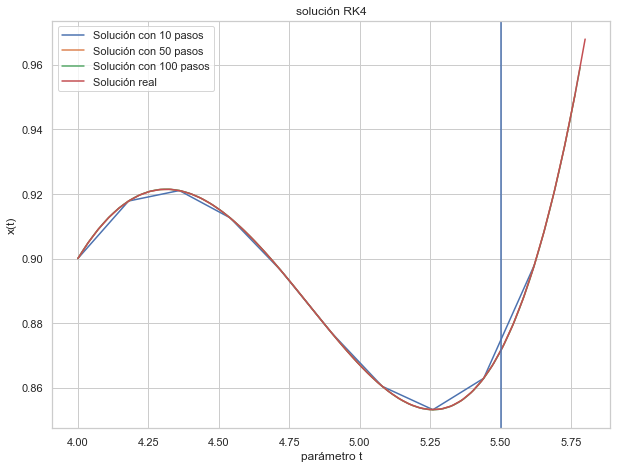

In [31]:
#solucionando con RK4 para distintos pasos
Sols_RK4=[]
Tiemp_RK4=[]
for m in list_k:
    xRK4,tRK4=RK4(xp,4,0.9,5.8,m)
    Sols_RK4.append(xRK4)
    Tiemp_RK4.append(tRK4)

    plt.rcParams["figure.figsize"] = (10,7.5)
    plt.plot(tRK4,xRK4,label=f'Solución con {m} pasos')
    #print(xE,tE)

plt.plot(t,x(t),'r',label='Solución real')
plt.legend()
plt.title('solución RK4')
plt.xlabel('parámetro t')
plt.ylabel('x(t)')

#plt.plot(5.5,x(),'-o')
plt.axvline(x=5.5)
plt.show()

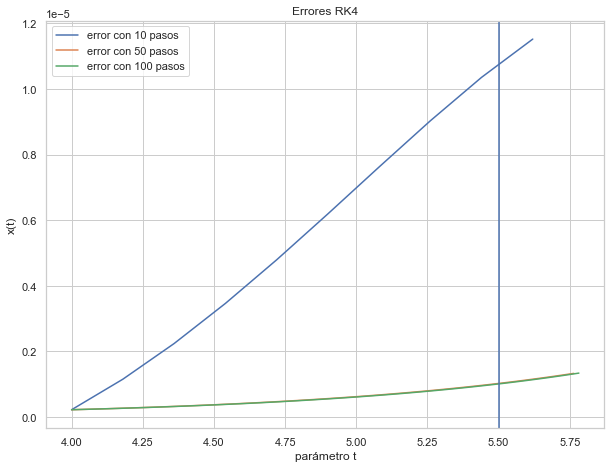

    !NOTA!    
El error como en el caso de la solucion, las curvas se acercan mucho y no se observa casi ninguna diferencia entre las curvas de 50 y 100 pasos, observe que los errores graficados tienen longitud 3


In [32]:
# calculando errores absolutos RK4
Errores_RK4=[]
for j in range(len(list_k)):
    d=list_k[j]
    error=np.abs(Sols_RK4[j]-x(Tiemp_RK4[j]))
    Errores_RK4.append(error)
    plt.plot(Tiemp_RK4[j],error,label=f'error con {d} pasos')

plt.rcParams["figure.figsize"] = (10,7.5)
plt.legend()
plt.title('Errores RK4')
plt.xlabel('parámetro t')
plt.ylabel('x(t)')

#plt.plot(5.5,x(),'-o')
plt.axvline(x=5.5)
plt.show()
print(f'    !NOTA!    \nEl error como en el caso de la solucion, las curvas se acercan mucho y no se observa casi ninguna diferencia entre las curvas de 50 y 100 pasos, observe que los errores graficados tienen longitud {len(Errores_RK4)}')

---

# Graficas de soluciones y error por numero de pasos

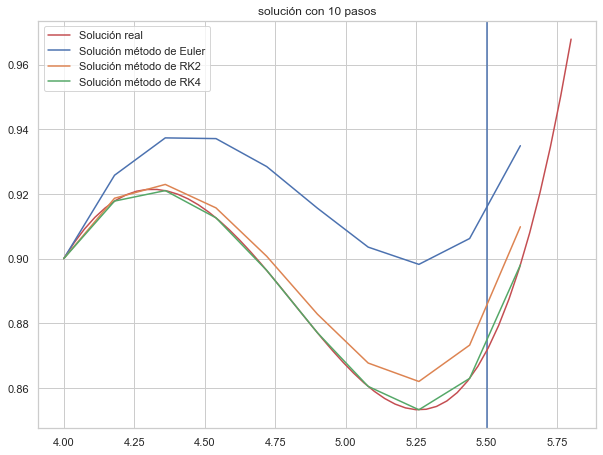

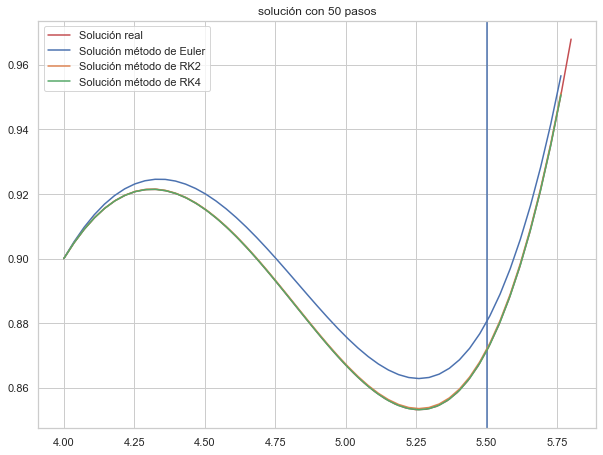

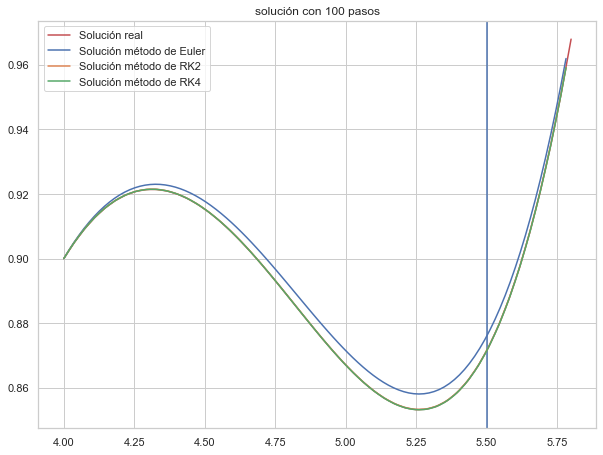

In [35]:
for k in range(3):
    l=list_k[k]
    plt.rcParams["figure.figsize"] = (10,7.5)
    plt.title(f'solución con {l} pasos')
    plt.axvline(x=5.5)
    plt.plot(t,x(t),'r',label='Solución real')
    plt.plot(Tiemp_Euler[k],Sols_Euler[k],label=f'Solución método de Euler')
    plt.plot(Tiemp_RK2[k],Sols_RK2[k],label=f'Solución método de RK2')
    plt.plot(Tiemp_RK4[k],Sols_RK4[k],label=f'Solución método de RK4')
    plt.legend()
    plt.show()


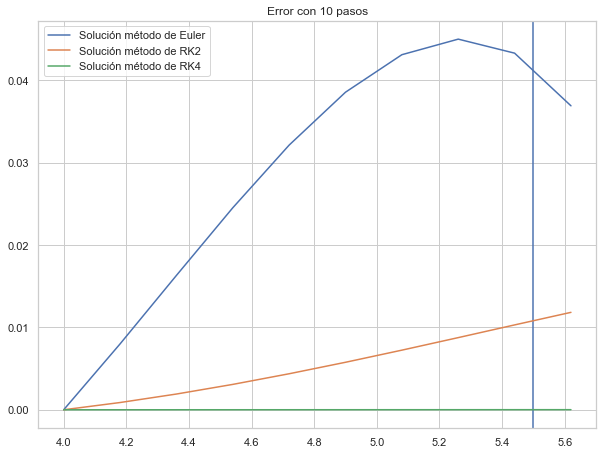

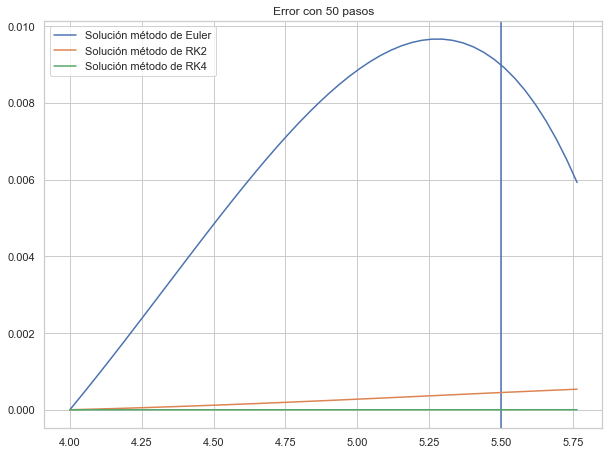

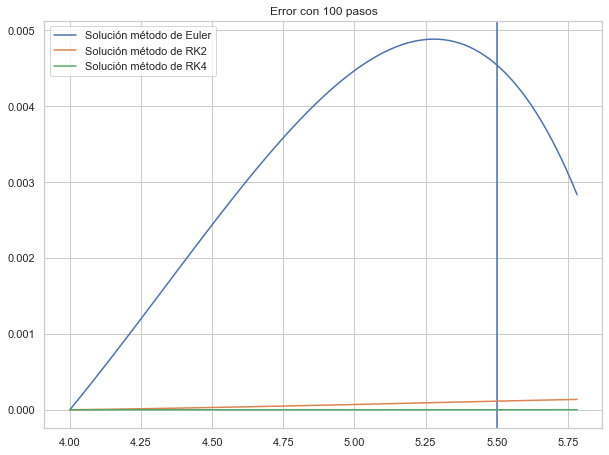

In [36]:
for k in range(3):
    l=list_k[k]
    plt.rcParams["figure.figsize"] = (10,7.5)
    plt.title(f'Error con {l} pasos')
    plt.axvline(x=5.5)
    plt.plot(Tiemp_Euler[k],Errores_Euler[k],label=f'Solución método de Euler')
    plt.plot(Tiemp_RK2[k],Errores_RK2[k],label=f'Solución método de RK2')
    plt.plot(Tiemp_RK4[k],Errores_RK4[k],label=f'Solución método de RK4')
    plt.legend()
    plt.show()


# Analizando resultados.
## Analizando graficas de soluciones y de error para cada método con distintos pasos

### Método de Euler
Se observa una clara discrepancia con la solución real aun aumentando el muero de pasos, pero es notable que a medida que estos aumentan el error en la aproximación se reducirá cada vez mas, como se observa en la gráfica respectiva de error.

Es importante mencionar que el error aumenta en regiones donde la curva de la función se pronuncia, es decir, en estas regiones próximas a donde la derivada sea 0 la aproximación tendrá mayor error que en regiones que esto no es asi, como se observa en la grafica de la solución del método.

### Método de Runge-kutta de orden 2

En la grafica de la solución es notable como las curvas con el numero de pasos 500 y 100 ya se acercan mucho a la solución real. de modo que se puede obtener una muy buena aproximación para un numero de pasos no exageradamente grande ya que esta no mejora de manera considerable con el aumento de pasos a diferencia del método de Euler.

Se observa como en las graficas del error los errores para pasos de 500 y 100 difieren pero ya en muy poca medida, corroborando lo antes mencionado acerca de el numero de pasos y su relación con el valor de la aproximación.

### Método de Runge-kutta de orden 4
De manera similar al método de orden 2 en las graficas de soluciones y error se observa un comportamiento similar pero con una mejor aproximación para el caso de 10 pasos, es decir que para este método no necesitamos muchos pasos para obtener una buena aproximación.

## Analizando graficas de soluciones y de error para cada numero de pasos con distintos métodos

En las graficas de soluciones y errores se observa que el método de Euler esta siempre con una peor aproximación a la solución, por tanto podemos afirmar que el método de Runge-Kutta de orden 2 con los mismos pasos se obtiene una mejor aproximación de igual forma para el método de Runge-kutta de orden 4 se obtiene una mejor aproximación que para orden 2. 

Es notable la diferencia de las aproximaciones de los métodos de Runge-Kutta y Euler en las proximidades de cuando la función se acerca a tener derivada 0, los métodos de Runge-kutta en estas situaciones se adaptan mejor consiguiendo una mejor aproximación

# Conclusiones
- El método de Euler depende del numero de pasos, de esta forma difiere mucho la aproximacion de la solucion.

- Los metodos de Runge-Kutta son mejores aproximando la solución en puntos críticos de la derivada, pero aun asi este error aumenta en estos puntos, este echo es altamente reducido a un numero de pasos considerable dependiendo del orden del método a mayor orden menor numero de pasos

- El método de runge-kutta de orden 4 es el que mejor aproxima la solución en un numero menor de pasos y reduce el error mas rápidamente respecto a la solución analítica. Esto también teniendo en cuenta que es el método que mayor pso computacional requiere

# referencias

[1] Heath, M. T. (2018). Scientific computing: an introductory survey, revised second edition. Society for Industrial and Applied Mathematics.

[3] Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers (Vol. 1221). New York: Mcgraw-hill.
